# Filtering and Clipping Street Segments Data

Author: Mark Bauer

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# reproducibility
%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

numpy    : 1.23.4
pandas   : 1.5.1
geopandas: 0.12.1



In [3]:
# data retrieved
current_date = datetime.now()
print(f"The data was retrieved on {current_date.strftime('%Y-%m-%d')}.")

The data was retrieved on 2025-04-06.


# Read in NYC Borough Geometry

In [4]:
# specify borough path
url = 'https://data.cityofnewyork.us/resource/gthc-hcne.geojson'
boros_gdf = gpd.read_file(url)

# convert to crs 2263
boros_gdf = boros_gdf.to_crs(epsg=2263)

# sanity check
print(f'shape of data: {boros_gdf.shape}')
boros_gdf.head()

shape of data: (5, 5)


,borocode,boroname,shape_area,shape_leng,geometry
0,3,Brooklyn,1934142842.48,728150.705111,"MULTIPOLYGON (((1022227.393 152028.338, 102207..."
1,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((970217.085 145643.397, 970227...."
2,1,Manhattan,636645571.613,360056.730857,"MULTIPOLYGON (((981219.022 188655.462, 980940...."
3,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((1012821.787 229228.479, 101278..."
4,4,Queens,3041418003.6,888197.010944,"MULTIPOLYGON (((1032452.096 154469.461, 103245..."


<AxesSubplot: >

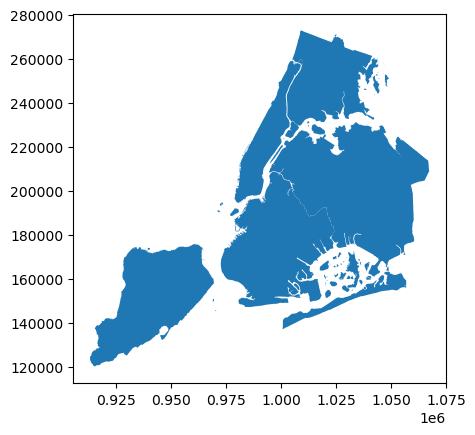

In [5]:
# sanity check map
boros_gdf.plot()

# Read in NYC Street Centerline (CSCL)
Notice the limit parameter. We need to assign this a large value to read in the whole dataset. It's approximately 122,000 rows.

In [6]:
%%time
url = 'https://data.cityofnewyork.us/resource/inkn-q76z.geojson?$limit=10000000'
streets_gdf = gpd.read_file(url)

# convert to crs 2263
streets_gdf = streets_gdf.to_crs(epsg=2263)

# sanity check
print(f'shape of data: {streets_gdf.shape}')
streets_gdf.head()

shape of data: (121960, 33)
CPU times: user 28.9 s, sys: 701 ms, total: 29.6 s
Wall time: 38.1 s


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,C,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929..."
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,C,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950..."
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,C,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964..."
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,C,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952..."
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,C,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026..."


In [7]:
# summary of data
streets_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 121960 entries, 0 to 121959
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rw_type     121960 non-null  object        
 1   l_low_hn    84455 non-null   object        
 2   pre_direct  10113 non-null   object        
 3   st_width    121960 non-null  object        
 4   r_zip       120662 non-null  object        
 5   r_low_hn    84455 non-null   object        
 6   bike_lane   16268 non-null   object        
 7   post_type   108421 non-null  object        
 8   r_blkfc_id  121960 non-null  object        
 9   bike_trafd  16268 non-null   object        
 10  frm_lvl_co  121960 non-null  object        
 11  post_modif  398 non-null     object        
 12  pre_type    2875 non-null    object        
 13  full_stree  121960 non-null  object        
 14  l_blkfc_id  121960 non-null  object        
 15  shape_leng  121960 non-null  object        

In [8]:
# count null per column
(streets_gdf
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

pre_modifi    121879
post_modif    121562
post_direc    120487
pre_type      119085
pre_direct    111847
bike_trafd    105692
bike_lane     105692
r_high_hn      37505
l_low_hn       37505
r_low_hn       37505
l_high_hn      37505
post_type      13539
snow_pri       10779
l_zip           1376
r_zip           1298
modified         284
trafdir            2
rw_type            0
st_label           0
physicalid         0
st_name            0
created            0
borocode           0
to_lvl_co          0
segment_ty         0
status             0
shape_leng         0
l_blkfc_id         0
full_stree         0
frm_lvl_co         0
r_blkfc_id         0
st_width           0
geometry           0
dtype: int64

<AxesSubplot: >

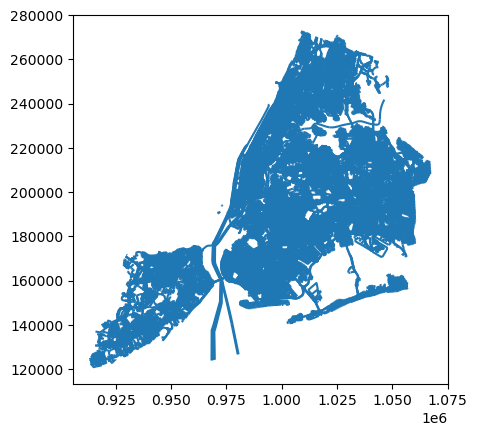

In [9]:
# sanity check of map
streets_gdf.plot()

In [10]:
# count of values by street type
streets_gdf['rw_type'].value_counts()

1     99324
6      5709
2      4124
10     3833
9      3579
3      3351
8       782
14      425
13      306
7       253
4       167
5       101
12        6
Name: rw_type, dtype: int64

# Map Street Codes to Category Names

In [11]:
# mapping street type codes to names
street_codes = {
    '1':'Street',
    '2':'Highway',
    '3':'Bridge',
    '4':'Tunnel',
    '5':'Boardwalk',
    '6':'Path/Trail',
    '7':'StepStreet',
    '8':'Driveway',
    '9':'Ramp',
    '10':'Alley',
    '11':'Unknown',
    '12':'Non-Physical Street Segment',
    '13':'U Turn',
    '14':'Ferry Route',
}

# map codes to names
streets_gdf['rw_type_name'] = streets_gdf['rw_type'].map(street_codes)

# sanity check
streets_gdf.loc[:, ['rw_type', 'rw_type_name']].head()

,rw_type,rw_type_name
0,1,Street
1,1,Street
2,1,Street
3,1,Street
4,1,Street


In [12]:
# count of values by street type
streets_gdf['rw_type_name'].value_counts(dropna=False)

Street                         99324
Path/Trail                      5709
Highway                         4124
Alley                           3833
Ramp                            3579
Bridge                          3351
Driveway                         782
Ferry Route                      425
U Turn                           306
StepStreet                       253
Tunnel                           167
Boardwalk                        101
Non-Physical Street Segment        6
Name: rw_type_name, dtype: int64

# Filter for only Streets

In [13]:
# we are only interested in streets for this project, rw_type = 1
streets_gdf = (
    streets_gdf
    .loc[streets_gdf['rw_type'] == '1']
    .reset_index(drop=True)
)

print(f'shape of data: {streets_gdf.shape}')
streets_gdf.head()

shape of data: (99324, 34)


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929...",Street
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950...",Street
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964...",Street
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952...",Street
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026...",Street


In [14]:
# sanity check data only contain streets
streets_gdf['rw_type_name'].value_counts()

Street    99324
Name: rw_type_name, dtype: int64

<AxesSubplot: >

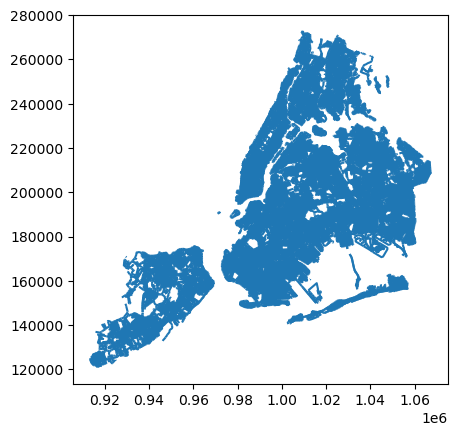

In [15]:
# sanity check map
streets_gdf.plot()

In [16]:
# check if id is unique
streets_gdf['physicalid'].is_unique

True

In [17]:
# return specified columns
cols = [
    'physicalid', 
    'st_label',
    'st_name',
    'full_stree',
    'rw_type', 
    'rw_type_name',  
    'st_width',
    'frm_lvl_co', 
    'to_lvl_co', 
    'borocode', 
    'shape_leng',
    'geometry',
]

streets_gdf = streets_gdf.loc[:, cols]

# sanity check
print(f'shape of data: {streets_gdf.shape}')
streets_gdf.head()

shape of data: (99324, 12)


,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,3,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,262.77781228,"MULTILINESTRING ((979278.595 196555.690, 97929..."
1,5,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,259.415988519,"MULTILINESTRING ((979377.413 196797.951, 97950..."
2,6,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,280.444780871,"MULTILINESTRING ((979503.289 197024.782, 97964..."
3,8,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,32.0701391509,"MULTILINESTRING ((979553.746 196059.826, 97952..."
4,14,BATTERY PL,BATTERY,BATTERY PL,1,Street,24.0,13,13,1,206.27185039,"MULTILINESTRING ((980288.092 195963.182, 98026..."


In [18]:
# save file
filename = '../data/streets.gpkg'

streets_gdf.to_file(
    filename=filename,
    driver='GPKG',
    layer='name',
    index=False
)

# verify output
%ls ../data/

README.md                               streets-clipped.gpkg
street-flooding-complaints-cleaned.csv  streets.gpkg
street-flooding-complaints.csv          water-main-break-raw.csv
street-flooding-raw.csv                 water-main-breaks.csv


Sanity Check of Output Data.

In [19]:
path = '../data/streets.gpkg'
streets = gpd.read_file(path)

# sanity check of data
print(f'shape of data: {streets.shape}')
streets.head()

shape of data: (99324, 12)


,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,3,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,262.77781228,"MULTILINESTRING ((979278.595 196555.690, 97929..."
1,5,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,259.415988519,"MULTILINESTRING ((979377.413 196797.951, 97950..."
2,6,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,280.444780871,"MULTILINESTRING ((979503.289 197024.782, 97964..."
3,8,BATTERY PL,BATTERY,BATTERY PL,1,Street,42.0,13,13,1,32.0701391509,"MULTILINESTRING ((979553.746 196059.826, 97952..."
4,14,BATTERY PL,BATTERY,BATTERY PL,1,Street,24.0,13,13,1,206.27185039,"MULTILINESTRING ((980288.092 195963.182, 98026..."


<AxesSubplot: >

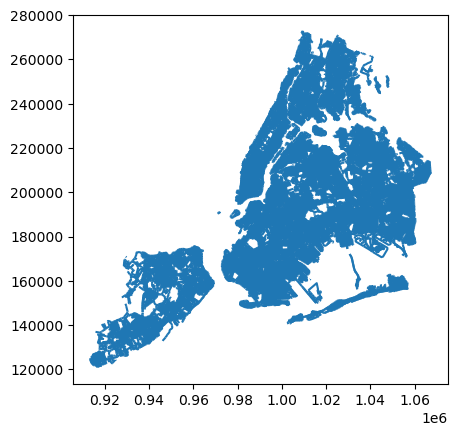

In [20]:
# sanity check
streets.plot()

In [21]:
# id is unique
streets['physicalid'].is_unique

True

In [22]:
# summary of data
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99324 entries, 0 to 99323
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   physicalid    99324 non-null  object  
 1   st_label      99324 non-null  object  
 2   st_name       99324 non-null  object  
 3   full_stree    99324 non-null  object  
 4   rw_type       99324 non-null  object  
 5   rw_type_name  99324 non-null  object  
 6   st_width      99324 non-null  object  
 7   frm_lvl_co    99324 non-null  object  
 8   to_lvl_co     99324 non-null  object  
 9   borocode      99324 non-null  object  
 10  shape_leng    99324 non-null  object  
 11  geometry      99324 non-null  geometry
dtypes: geometry(1), object(11)
memory usage: 9.1+ MB
